In [1]:
import argparse
import logging
import os
import sys

import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from torch import optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split

sys.path.append("..")
sys.path.append("../scripts/")
import superlayer.utils

from scripts import eval_net, train_net, get_args

from superlayer.models import SuperNet, AESuperNet
from superlayer.utils import BrainD, dice_coeff, one_hot, plot_img_array, plot_side_by_side

In [2]:
dir_img = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/vols/'
dir_mask = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/asegs/'

dir_train = '/home/vib9/src/SL-Net/jupyter/partitions/train.txt'
dir_val = '/home/vib9/src/SL-Net/jupyter/partitions/val.txt'

dir_checkpoint_1 = 'checkpoints_1/'
dir_checkpoint_2 = 'checkpoints_2/'

In [3]:
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
args = get_args()
device = torch.device('cuda')
logging.info(f'Using device {device}')

INFO: Using device cuda


In [4]:
target_label_numbers = [0,2,3,4,10,16,17,28,31,41,42,43,49,53,63]
val_percent = 0.1
batch_size = args.batchsize
lr = args.lr
img_scale = args.scale
writer = SummaryWriter(comment=f'LR_{lr}_BS_{batch_size}_SCALE_{img_scale}')

In [8]:
net1 = SuperNet(input_ch=1, out_ch=15, use_bn=True, superblock_size=128, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net1.to(device=device)
train_scores1, val_scores1, train_var_1, val_var_1 = train_net(net=net1,
                                                                epochs=5,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          5
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  74%|███████▍  | 681/916 [00:27<00:07, 31.37batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 23.39batch/s]
                                                                      INFO: Validation Dice Loss: 0.10284217000495659
Validation round:  60%|██████    | 554/916 [00:28<00:15, 23.77batch/s]


Validation round:  99%|█████████▉| 910/916 [00:47<00:00, 14.72batch/s]
                                                                      INFO: Validation Dice Loss: 0.09630390105354213
Validation round:  21%|██        | 189/916 [00:10<00:39, 18.30batch/s]


Validation round:  68%|██████▊   | 624/916 [00:34<00:18, 15.51batch/s]


Validation round: 100%|█████████▉| 914/916 [00:50<00:00, 17.03batch/s]
                                                                      INFO: Validation Dice Loss: 0.09636542528021805
Validation round:  18%|█▊        | 169/916 [00:10<00:47, 15.76batch/s]


Validation round:  70%|███████   | 645/916 [00:35<00:15, 17.74batch/s]


Validation round: 100%|█████████▉| 912/916 [00:50<00:00, 15.23batch/s]
                                                                      INFO: Validation Dice Loss: 0.09496302488686997
Validation round:  15%|█▌        | 138/916 [00:08<00:43, 17.73batch/s]


Validation round:  73%|███████▎  | 666/916 [00:37<00:15, 16.06batch/s]


Validation round:  99%|█████████▉| 911/916 [00:50<00:00, 16.69batch/s]
                                                                      INFO: Validation Dice Loss: 0.08878210443987077
Epoch 1/5: 100%|██████████| 7329/7329 [04:40<00:00, 26.14img/s, loss (batch)=0.314] 
INFO: Checkpoint 1 saved !
Validation round:  21%|██▏       | 195/916 [00:11<00:49, 14.53batch/s]


Validation round:  70%|██████▉   | 641/916 [00:35<00:14, 18.87batch/s]


Validation round: 100%|█████████▉| 915/916 [00:50<00:00, 18.06batch/s]
                                                                      INFO: Validation Dice Loss: 0.08921290590838574
Validation round:  17%|█▋        | 154/916 [00:09<00:50, 15.10batch/s]


Validation round:  77%|███████▋  | 706/916 [00:39<00:11, 18.04batch/s]


Validation round: 100%|█████████▉| 915/916 [00:51<00:00, 20.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.0865734874242388
Validation round:  28%|██▊       | 256/916 [00:14<00:32, 20.53batch/s]


Validation round:  79%|███████▉  | 722/916 [00:40<00:09, 19.57batch/s]


Validation round: 100%|█████████▉| 914/916 [00:50<00:00, 19.46batch/s]
                                                                      INFO: Validation Dice Loss: 0.08373351262548866
Validation round:  24%|██▍       | 223/916 [00:12<00:35, 19.26batch/s]


Validation round:  76%|███████▌  | 697/916 [00:38<00:11, 19.71batch/s]


Validation round: 100%|█████████▉| 914/916 [00:50<00:00, 20.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.08429746773891053
Validation round:  25%|██▍       | 226/916 [00:13<00:41, 16.47batch/s]


Validation round:  78%|███████▊  | 714/916 [00:39<00:13, 14.94batch/s]


Validation round: 100%|█████████▉| 914/916 [00:50<00:00, 21.15batch/s]
                                                                      INFO: Validation Dice Loss: 0.06142781068892198
Epoch 2/5: 100%|██████████| 7329/7329 [05:04<00:00, 24.06img/s, loss (batch)=0.172] 
INFO: Checkpoint 2 saved !
Validation round:  22%|██▏       | 198/916 [00:14<01:02, 11.42batch/s]


Validation round:  76%|███████▋  | 699/916 [00:43<00:14, 15.32batch/s]


Validation round: 100%|█████████▉| 914/916 [00:55<00:00, 15.81batch/s]
                                                                      INFO: Validation Dice Loss: 0.06492415475598069
Validation round:  22%|██▏       | 200/916 [00:12<00:39, 18.04batch/s]


Validation round:  71%|███████▏  | 654/916 [00:37<00:13, 19.87batch/s]


Validation round: 100%|█████████▉| 915/916 [00:51<00:00, 18.06batch/s]
                                                                      INFO: Validation Dice Loss: 0.058132464155619845
Validation round:  25%|██▍       | 225/916 [00:12<00:38, 18.04batch/s]


Validation round:  73%|███████▎  | 669/916 [00:33<00:12, 19.56batch/s]


Validation round: 100%|█████████▉| 913/916 [00:45<00:00, 20.56batch/s]
                                                                      INFO: Validation Dice Loss: 0.057761986768401864
Validation round:  27%|██▋       | 249/916 [00:12<00:30, 21.55batch/s]


Validation round:  84%|████████▎ | 766/916 [00:38<00:06, 21.66batch/s]


Validation round: 100%|██████████| 916/916 [00:46<00:00, 20.34batch/s]
                                                                      INFO: Validation Dice Loss: 0.05791090083141775
Validation round:  30%|██▉       | 272/916 [00:15<00:31, 20.65batch/s]


Validation round:  77%|███████▋  | 704/916 [00:39<00:13, 15.20batch/s]


Validation round: 100%|█████████▉| 915/916 [00:50<00:00, 19.59batch/s]
                                                                      INFO: Validation Dice Loss: 0.05699710617874908
Epoch 3/5: 100%|██████████| 7329/7329 [05:00<00:00, 24.42img/s, loss (batch)=0.138] 
INFO: Checkpoint 3 saved !
Validation round:  21%|██        | 193/916 [00:11<00:40, 17.81batch/s]


Validation round:  66%|██████▌   | 603/916 [00:33<00:19, 16.04batch/s]


Validation round: 100%|█████████▉| 914/916 [00:50<00:00, 27.30batch/s]
                                                                      INFO: Validation Dice Loss: 0.05942802060411747
Validation round:   9%|▊         | 80/916 [00:05<00:44, 18.69batch/s]


Validation round:  62%|██████▏   | 564/916 [00:31<00:18, 19.28batch/s]


Validation round: 100%|██████████| 916/916 [00:50<00:00, 17.53batch/s]
                                                                      INFO: Validation Dice Loss: 0.05806896186486602
Validation round:  10%|▉         | 89/916 [00:05<00:46, 17.73batch/s]


Validation round:  57%|█████▋    | 519/916 [00:29<00:24, 16.50batch/s]


Validation round: 100%|█████████▉| 915/916 [00:50<00:00, 19.33batch/s]
                                                                      INFO: Validation Dice Loss: 0.056611807821684526
Validation round:   2%|▏         | 14/916 [00:01<05:50,  2.57batch/s]


Validation round:  48%|████▊     | 442/916 [00:25<00:25, 18.67batch/s]


Validation round: 100%|█████████▉| 915/916 [00:54<00:00, 17.02batch/s]


                                                                      INFO: Validation Dice Loss: 0.042006693943098646
Validation round:  45%|████▍     | 412/916 [00:23<00:23, 21.22batch/s]


Validation round:  91%|█████████ | 833/916 [00:46<00:05, 15.91batch/s]


Validation round: 100%|██████████| 916/916 [00:50<00:00, 22.44batch/s]
                                                                      INFO: Validation Dice Loss: 0.04161449322501384
Epoch 4/5: 100%|██████████| 7329/7329 [05:07<00:00, 23.86img/s, loss (batch)=0.101]  
INFO: Checkpoint 4 saved !
Validation round:  35%|███▌      | 321/916 [00:18<00:36, 16.39batch/s]


Validation round:  90%|████████▉ | 820/916 [00:46<00:05, 17.20batch/s]


Validation round: 100%|█████████▉| 912/916 [00:51<00:00, 18.78batch/s]
                                                                      INFO: Validation Dice Loss: 0.04250447987273791
Validation round:  38%|███▊      | 352/916 [00:20<00:29, 19.31batch/s]


Validation round:  83%|████████▎ | 760/916 [00:42<00:06, 25.15batch/s]


Validation round: 100%|█████████▉| 913/916 [00:50<00:00, 18.42batch/s]
                                                                      INFO: Validation Dice Loss: 0.04156999137073625
Validation round:  33%|███▎      | 303/916 [00:16<00:31, 19.42batch/s]


Validation round:  92%|█████████▏| 844/916 [00:45<00:04, 16.70batch/s]


Validation round: 100%|█████████▉| 915/916 [00:49<00:00, 17.17batch/s]
                                                                      INFO: Validation Dice Loss: 0.04166553391542237
Validation round:  41%|████▏     | 379/916 [00:21<00:35, 15.21batch/s]


Validation round:  92%|█████████▏| 846/916 [00:47<00:04, 14.82batch/s]


Validation round: 100%|█████████▉| 915/916 [00:51<00:00, 24.37batch/s]
                                                                      INFO: Validation Dice Loss: 0.04144071258083962
Validation round:  41%|████▏     | 380/916 [00:22<00:34, 15.54batch/s]


Validation round:  92%|█████████▏| 842/916 [00:47<00:04, 16.81batch/s]


Validation round: 100%|█████████▉| 914/916 [00:51<00:00, 15.57batch/s]
                                                                      INFO: Validation Dice Loss: 0.040546639362862534
Epoch 5/5: 100%|██████████| 7329/7329 [05:07<00:00, 23.85img/s, loss (batch)=0.0913] 
INFO: Checkpoint 5 saved !


In [6]:
net2 = AESuperNet(input_ch=1, out_ch=15, use_bn=True, superblock_size=256, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net2.to(device=device)
train_scores2, val_scores2, train_var_2, val_var_2 = train_net(net=net2,
                                                                epochs=5,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          5
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  24%|██▍       | 220/916 [00:12<00:35, 19.81batch/s]


Validation round:  49%|████▉     | 452/916 [00:24<00:23, 19.50batch/s]


Validation round:  74%|███████▍  | 678/916 [00:36<00:12, 18.99batch/s]


Validation round: 100%|█████████▉| 913/916 [00:48<00:00, 20.03batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 20.01batch/s]
                                                                      INFO: Validation Dice Loss: 0.20637315863084585
Validation round:  24%|██▍       | 218/916 [00:12<00:35, 19.42batch/s]


Validation round:  51%|█████     | 464/916 [00:24<00:22, 20.01batch/s]


Validation round:  77%|███████▋  | 709/916 [00:37<00:10, 19.94batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 19.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.19627758675136942
Validation round:   3%|▎         | 24/916 [00:02<01:00, 14.79batch/s]


Validation round:  31%|███       | 280/916 [00:15<00:31, 20.19batch/s]


Validation round:  58%|█████▊    | 528/916 [00:27<00:19, 19.51batch/s]


Validation round:  84%|████████▍ | 774/916 [00:40<00:07, 19.05batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.11batch/s]
                                                                      INFO: Validation Dice Loss: 0.15177462327265584
Validation round:   9%|▉         | 84/916 [00:05<00:51, 16.16batch/s]


Validation round:  37%|███▋      | 336/916 [00:18<00:30, 19.24batch/s]


Validation round:  66%|██████▋   | 608/916 [00:32<00:17, 17.93batch/s]


Validation round:  96%|█████████▌| 877/916 [00:46<00:02, 19.22batch/s]


Validation round: 100%|█████████▉| 914/916 [00:48<00:00, 20.27batch/s]
                                                                      INFO: Validation Dice Loss: 0.15293120020211523
Validation round:  21%|██        | 194/916 [00:12<00:38, 19.00batch/s]


Validation round:  50%|████▉     | 457/916 [00:25<00:24, 19.06batch/s]


Validation round:  79%|███████▉  | 727/916 [00:39<00:09, 19.38batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 19.60batch/s]
                                                                      INFO: Validation Dice Loss: 0.10962098802736753
Epoch 1/5: 100%|██████████| 7329/7329 [06:19<00:00, 19.31img/s, loss (batch)=0.494]
INFO: Checkpoint 1 saved !
Validation round:   8%|▊         | 70/916 [00:04<00:41, 20.16batch/s]


Validation round:  36%|███▌      | 326/916 [00:17<00:29, 19.81batch/s]


Validation round:  65%|██████▍   | 595/916 [00:31<00:16, 19.03batch/s]


Validation round:  92%|█████████▏| 842/916 [00:43<00:03, 19.17batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.51batch/s]
                                                                      INFO: Validation Dice Loss: 0.09368362746254326
Validation round:  18%|█▊        | 165/916 [00:09<00:39, 19.23batch/s]


Validation round:  43%|████▎     | 397/916 [00:21<00:27, 19.18batch/s]


Validation round:  72%|███████▏  | 660/916 [00:34<00:13, 19.67batch/s]


Validation round: 100%|█████████▉| 912/916 [00:47<00:00, 19.71batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.82batch/s]
                                                                      INFO: Validation Dice Loss: 0.08251908094536789
Validation round:  27%|██▋       | 245/916 [00:13<00:35, 19.03batch/s]


Validation round:  54%|█████▍    | 494/916 [00:26<00:21, 19.84batch/s]


Validation round:  80%|███████▉  | 729/916 [00:38<00:09, 19.59batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.25batch/s]
                                                                      INFO: Validation Dice Loss: 0.0804011198045385
Validation round:   5%|▍         | 43/916 [00:03<00:44, 19.64batch/s]


Validation round:  32%|███▏      | 291/916 [00:15<00:31, 19.73batch/s]


Validation round:  60%|██████    | 553/916 [00:28<00:18, 19.88batch/s]


Validation round:  89%|████████▉ | 814/916 [00:42<00:05, 20.08batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.53batch/s]
                                                                      INFO: Validation Dice Loss: 0.07920545840627762
Validation round:  16%|█▌        | 148/916 [00:08<00:38, 20.14batch/s]


Validation round:  44%|████▎     | 399/916 [00:21<00:27, 18.99batch/s]


Validation round:  69%|██████▉   | 636/916 [00:33<00:14, 19.05batch/s]


Validation round:  97%|█████████▋| 886/916 [00:46<00:01, 18.93batch/s]


Validation round: 100%|█████████▉| 915/916 [00:48<00:00, 19.61batch/s]
                                                                      INFO: Validation Dice Loss: 0.07630748575854249
Epoch 2/5: 100%|██████████| 7329/7329 [06:16<00:00, 19.46img/s, loss (batch)=0.142]
INFO: Checkpoint 2 saved !
Validation round:  20%|██        | 187/916 [00:11<00:36, 19.86batch/s]


Validation round:  50%|████▉     | 457/916 [00:24<00:24, 19.06batch/s]


Validation round:  78%|███████▊  | 717/916 [00:38<00:09, 20.02batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 20.02batch/s]
                                                                      INFO: Validation Dice Loss: 0.07626761567644677
Validation round:   4%|▍         | 41/916 [00:02<00:46, 18.85batch/s]


Validation round:  31%|███       | 286/916 [00:15<00:31, 19.74batch/s]


Validation round:  59%|█████▊    | 536/916 [00:28<00:19, 19.58batch/s]


Validation round:  84%|████████▍ | 774/916 [00:40<00:07, 19.16batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.18batch/s]
                                                                      INFO: Validation Dice Loss: 0.07533892920834528
Validation round:  11%|█         | 101/916 [00:05<00:42, 19.17batch/s]


Validation round:  39%|███▉      | 361/916 [00:19<00:28, 19.65batch/s]


Validation round:  66%|██████▌   | 601/916 [00:31<00:16, 19.01batch/s]


Validation round:  93%|█████████▎| 852/916 [00:44<00:03, 19.97batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.15batch/s]
                                                                      INFO: Validation Dice Loss: 0.07462872516803086
Validation round:  17%|█▋        | 159/916 [00:09<00:39, 19.24batch/s]


Validation round:  46%|████▌     | 417/916 [00:22<00:25, 19.55batch/s]


Validation round:  75%|███████▌  | 689/916 [00:35<00:11, 19.16batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.42batch/s]
                                                                      INFO: Validation Dice Loss: 0.0731580464990899


Validation round:  26%|██▋       | 242/916 [00:13<00:33, 19.87batch/s]


Validation round:  53%|█████▎    | 483/916 [00:25<00:22, 18.96batch/s]


Validation round:  80%|███████▉  | 729/916 [00:38<00:09, 20.13batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 20.13batch/s]
                                                                      INFO: Validation Dice Loss: 0.07273818670434462
Epoch 3/5: 100%|██████████| 7329/7329 [06:18<00:00, 19.35img/s, loss (batch)=0.117]
INFO: Checkpoint 3 saved !
Validation round:   5%|▌         | 48/916 [00:03<00:43, 19.97batch/s]


Validation round:  32%|███▏      | 294/916 [00:15<00:32, 18.86batch/s]


Validation round:  59%|█████▉    | 545/916 [00:28<00:19, 18.91batch/s]


Validation round:  87%|████████▋ | 797/916 [00:41<00:06, 19.33batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.10batch/s]
                                                                      INFO: Validation Dice Loss: 0.07256297879409061
Validation round:  11%|█         | 98/916 [00:05<00:41, 19.71batch/s]


Validation round:  38%|███▊      | 347/916 [00:20<00:28, 19.88batch/s]


Validation round:  67%|██████▋   | 615/916 [00:34<00:15, 18.94batch/s]


Validation round:  95%|█████████▍| 870/916 [00:47<00:02, 19.62batch/s]


Validation round: 100%|██████████| 916/916 [00:49<00:00, 20.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.07061347441837257
Validation round:  23%|██▎       | 209/916 [00:11<00:36, 19.47batch/s]


Validation round:  49%|████▉     | 447/916 [00:23<00:24, 19.04batch/s]


Validation round:  76%|███████▌  | 694/916 [00:36<00:11, 20.06batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.35batch/s]
                                                                      INFO: Validation Dice Loss: 0.07427052205924645
Validation round:   0%|          | 3/916 [00:00<08:47,  1.73batch/s]


Validation round:  30%|███       | 276/916 [00:14<00:32, 19.97batch/s]


Validation round:  57%|█████▋    | 518/916 [00:27<00:20, 19.07batch/s]


Validation round:  84%|████████▍ | 773/916 [00:40<00:07, 19.00batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.99batch/s]
                                                                      INFO: Validation Dice Loss: 0.07143078182364396
Validation round:  11%|█         | 97/916 [00:05<00:42, 19.29batch/s]


Validation round:  39%|███▉      | 360/916 [00:19<00:27, 19.86batch/s]


Validation round:  66%|██████▋   | 609/916 [00:31<00:15, 19.94batch/s]


Validation round:  93%|█████████▎| 856/916 [00:44<00:03, 19.78batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.54batch/s]
                                                                      INFO: Validation Dice Loss: 0.06961841855246947
Epoch 4/5: 100%|██████████| 7329/7329 [06:18<00:00, 19.35img/s, loss (batch)=0.118]
INFO: Checkpoint 4 saved !
Validation round:  19%|█▉        | 173/916 [00:09<00:37, 19.74batch/s]


Validation round:  47%|████▋     | 426/916 [00:22<00:25, 19.28batch/s]


Validation round:  72%|███████▏  | 656/916 [00:34<00:13, 19.18batch/s]


Validation round:  97%|█████████▋| 884/916 [00:46<00:01, 19.10batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 20.36batch/s]
                                                                      INFO: Validation Dice Loss: 0.0693890730968339
Validation round:  24%|██▍       | 221/916 [00:12<00:34, 20.18batch/s]


Validation round:  50%|████▉     | 456/916 [00:24<00:23, 19.56batch/s]


Validation round:  76%|███████▋  | 699/916 [00:36<00:11, 19.35batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 20.03batch/s]
                                                                      INFO: Validation Dice Loss: 0.06776508326158252
Validation round:   3%|▎         | 29/916 [00:02<00:50, 17.74batch/s]


Validation round:  32%|███▏      | 296/916 [00:15<00:30, 20.01batch/s]


Validation round:  59%|█████▉    | 542/916 [00:28<00:19, 19.64batch/s]


Validation round:  86%|████████▌ | 787/916 [00:41<00:06, 18.90batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.39batch/s]
                                                                      INFO: Validation Dice Loss: 0.06845793396429724
Validation round:  12%|█▏        | 106/916 [00:06<00:42, 18.98batch/s]


Validation round:  38%|███▊      | 347/916 [00:18<00:29, 19.33batch/s]


Validation round:  64%|██████▍   | 585/916 [00:30<00:17, 19.01batch/s]


Validation round:  90%|████████▉ | 823/916 [00:43<00:04, 19.75batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 20.28batch/s]
                                                                      INFO: Validation Dice Loss: 0.06721666067285569
Validation round:  16%|█▌        | 148/916 [00:08<00:38, 19.93batch/s]


Validation round:  45%|████▌     | 413/916 [00:21<00:25, 19.46batch/s]


Validation round:  74%|███████▍  | 679/916 [00:35<00:12, 19.05batch/s]


Validation round:  99%|█████████▉| 907/916 [00:47<00:00, 19.47batch/s]


Validation round: 100%|█████████▉| 914/916 [00:47<00:00, 19.88batch/s]
                                                                      INFO: Validation Dice Loss: 0.06660427365403249
Epoch 5/5: 100%|██████████| 7329/7329 [06:16<00:00, 19.44img/s, loss (batch)=0.105]
INFO: Checkpoint 5 saved !


In [10]:
net3 = SuperNet(input_ch=1, out_ch=15, use_bn=True, superblock_size=256, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net3.to(device=device)
train_scores3, val_scores3, train_var_3, val_var_3 = train_net(net=net3,
                                                                epochs=5,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          5
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  32%|███▏      | 289/916 [00:16<00:34, 18.44batch/s]


Validation round:  62%|██████▏   | 572/916 [00:31<00:17, 19.61batch/s]


Validation round: 100%|█████████▉| 914/916 [00:49<00:00, 16.12batch/s]
                                                                      INFO: Validation Dice Loss: 0.26675782791912295


Validation round:  26%|██▋       | 242/916 [00:13<00:34, 19.81batch/s]


Validation round:  63%|██████▎   | 576/916 [00:31<00:17, 19.41batch/s]


Validation round: 100%|█████████▉| 914/916 [00:50<00:00, 22.98batch/s]


                                                                      INFO: Validation Dice Loss: 0.6932903148852061
Validation round:  34%|███▎      | 307/916 [00:18<00:30, 20.08batch/s]


Validation round:  67%|██████▋   | 614/916 [00:35<00:17, 17.05batch/s]


Validation round: 100%|██████████| 916/916 [00:52<00:00, 19.45batch/s]
                                                                      INFO: Validation Dice Loss: 0.6903508109036491
Validation round:   1%|▏         | 12/916 [00:01<03:56,  3.82batch/s]


Validation round:  38%|███▊      | 345/916 [00:20<00:32, 17.73batch/s]


Validation round:  75%|███████▍  | 685/916 [00:38<00:13, 17.41batch/s]


Validation round: 100%|█████████▉| 913/916 [00:51<00:00, 16.88batch/s]
                                                                      INFO: Validation Dice Loss: 0.7058938355815463
Validation round:   1%|          | 9/916 [00:01<05:15,  2.88batch/s]


Validation round:  36%|███▋      | 334/916 [00:19<00:33, 17.29batch/s]


Validation round:  63%|██████▎   | 578/916 [00:33<00:19, 17.43batch/s]


Validation round:  98%|█████████▊| 897/916 [00:51<00:01, 17.26batch/s]


Validation round: 100%|█████████▉| 914/916 [00:52<00:00, 20.09batch/s]
                                                                      INFO: Validation Dice Loss: 0.6970313402242535
Epoch 1/5: 100%|██████████| 7329/7329 [06:00<00:00, 20.34img/s, loss (batch)=0.625]
INFO: Checkpoint 1 saved !
Validation round:  28%|██▊       | 256/916 [00:15<00:39, 16.68batch/s]


Validation round:  57%|█████▋    | 526/916 [00:30<00:22, 17.06batch/s]


Validation round:  94%|█████████▎| 858/916 [00:48<00:03, 17.85batch/s]


Validation round: 100%|██████████| 916/916 [00:51<00:00, 22.37batch/s]
                                                                      INFO: Validation Dice Loss: 0.6960547711521257
Validation round:  20%|██        | 186/916 [00:11<00:42, 17.02batch/s]


Validation round:  52%|█████▏    | 479/916 [00:30<00:36, 11.88batch/s]


Validation round:  87%|████████▋ | 794/916 [00:54<00:07, 15.46batch/s]


Validation round: 100%|█████████▉| 914/916 [01:02<00:00, 12.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.7008857994490836
Validation round:  18%|█▊        | 169/916 [00:11<00:37, 19.87batch/s]


Validation round:  54%|█████▍    | 497/916 [00:29<00:20, 20.44batch/s]


Validation round:  92%|█████████▏| 841/916 [00:49<00:04, 18.58batch/s]


Validation round: 100%|█████████▉| 915/916 [00:53<00:00, 21.36batch/s]
                                                                      INFO: Validation Dice Loss: 0.6972107647808358
Validation round:  27%|██▋       | 246/916 [00:14<00:36, 18.29batch/s]


Validation round:  64%|██████▎   | 583/916 [00:34<00:17, 19.34batch/s]


Validation round:  93%|█████████▎| 848/916 [00:49<00:04, 16.76batch/s]


Validation round: 100%|█████████▉| 914/916 [00:52<00:00, 19.78batch/s]
                                                                      INFO: Validation Dice Loss: 0.6960780460501342
Validation round:  24%|██▍       | 223/916 [00:13<00:33, 20.56batch/s]


Validation round:  59%|█████▉    | 540/916 [00:31<00:23, 16.11batch/s]


Validation round:  88%|████████▊ | 802/916 [00:45<00:06, 17.56batch/s]


Validation round: 100%|█████████▉| 915/916 [00:52<00:00, 19.29batch/s]
                                                                      INFO: Validation Dice Loss: 0.6970595785754217
Epoch 2/5: 100%|██████████| 7329/7329 [06:13<00:00, 19.61img/s, loss (batch)=0.63] 
INFO: Checkpoint 2 saved !
Validation round:  22%|██▏       | 202/916 [00:12<00:39, 17.98batch/s]


Validation round:  50%|█████     | 459/916 [00:26<00:24, 18.62batch/s]


Validation round:  85%|████████▍ | 775/916 [00:43<00:07, 18.46batch/s]


Validation round: 100%|█████████▉| 914/916 [00:51<00:00, 19.58batch/s]
                                                                      INFO: Validation Dice Loss: 0.6966308706061809
Validation round:  14%|█▍        | 132/916 [00:08<00:47, 16.53batch/s]


Validation round:  45%|████▌     | 415/916 [00:24<00:34, 14.33batch/s]


Validation round:  81%|████████▏ | 745/916 [00:42<00:07, 21.99batch/s]


Validation round: 100%|█████████▉| 914/916 [00:52<00:00, 20.87batch/s]
                                                                      INFO: Validation Dice Loss: 0.6970645336344773
Validation round:  13%|█▎        | 115/916 [00:07<00:41, 19.49batch/s]


Validation round:  46%|████▌     | 419/916 [00:24<00:27, 18.16batch/s]


Validation round:  82%|████████▏ | 749/916 [00:43<00:09, 18.26batch/s]


Validation round: 100%|█████████▉| 914/916 [00:52<00:00, 16.41batch/s]
                                                                      INFO: Validation Dice Loss: 0.6965987176744178
Validation round:  16%|█▌        | 148/916 [00:09<00:44, 17.34batch/s]


Validation round:  53%|█████▎    | 483/916 [00:28<00:28, 15.20batch/s]


Validation round:  84%|████████▍ | 774/916 [00:44<00:08, 17.66batch/s]


Validation round: 100%|█████████▉| 914/916 [00:52<00:00, 27.53batch/s]
                                                                      INFO: Validation Dice Loss: 0.6966974784713645
Validation round:  13%|█▎        | 115/916 [00:07<00:47, 16.97batch/s]


Validation round:  49%|████▉     | 450/916 [00:26<00:22, 20.82batch/s]


Validation round:  76%|███████▋  | 700/916 [00:40<00:09, 23.17batch/s]


Validation round: 100%|█████████▉| 914/916 [00:51<00:00, 22.84batch/s]
                                                                      INFO: Validation Dice Loss: 0.6967258846395401
Epoch 3/5: 100%|██████████| 7329/7329 [06:05<00:00, 20.03img/s, loss (batch)=0.621]
INFO: Checkpoint 3 saved !
Validation round:  11%|█         | 98/916 [00:06<00:45, 17.97batch/s]


Validation round:  44%|████▎     | 400/916 [00:29<00:28, 17.85batch/s]


Validation round:  78%|███████▊  | 711/916 [00:46<00:11, 17.72batch/s]


Validation round: 100%|█████████▉| 914/916 [00:58<00:00, 21.68batch/s]
                                                                      INFO: Validation Dice Loss: 0.6967917058014974
Validation round:   9%|▉         | 83/916 [00:05<00:50, 16.58batch/s]


Validation round:  38%|███▊      | 348/916 [00:20<00:31, 18.01batch/s]


Validation round:  74%|███████▍  | 681/916 [00:39<00:14, 16.56batch/s]


Validation round: 100%|█████████▉| 915/916 [00:52<00:00, 19.76batch/s]
                                                                      INFO: Validation Dice Loss: 0.6967926604518724
Validation round:   9%|▉         | 83/916 [00:05<00:49, 16.86batch/s]


Validation round:  44%|████▎     | 399/916 [00:23<00:26, 19.68batch/s]


Validation round:  81%|████████  | 744/916 [00:42<00:11, 15.51batch/s]


Validation round: 100%|██████████| 916/916 [00:52<00:00, 20.92batch/s]
                                                                      INFO: Validation Dice Loss: 0.6967919961463936
Validation round:  16%|█▌        | 143/916 [00:08<00:42, 18.10batch/s]


Validation round:  52%|█████▏    | 472/916 [00:27<00:23, 19.19batch/s]


Validation round:  85%|████████▌ | 779/916 [00:43<00:07, 18.66batch/s]


Validation round: 100%|██████████| 916/916 [00:51<00:00, 18.43batch/s]
                                                                      INFO: Validation Dice Loss: 0.6967914950379117
Validation round:  13%|█▎        | 115/916 [00:07<00:44, 18.13batch/s]


Validation round:  48%|████▊     | 437/916 [00:25<00:31, 15.05batch/s]


Validation round:  75%|███████▍  | 686/916 [00:39<00:14, 15.67batch/s]


Validation round: 100%|█████████▉| 913/916 [00:51<00:00, 17.26batch/s]
                                                                      INFO: Validation Dice Loss: 0.6967965788065607
Epoch 4/5: 100%|██████████| 7329/7329 [06:12<00:00, 19.70img/s, loss (batch)=0.617]
INFO: Checkpoint 4 saved !
Validation round:   9%|▊         | 80/916 [00:05<00:44, 18.58batch/s]


Validation round:  40%|███▉      | 364/916 [00:21<00:33, 16.67batch/s]


Validation round:  72%|███████▏  | 661/916 [00:37<00:14, 17.30batch/s]


Validation round: 100%|█████████▉| 914/916 [00:51<00:00, 21.93batch/s]
                                                                      INFO: Validation Dice Loss: 0.6967948379735238
Validation round:   6%|▌         | 52/916 [00:03<00:51, 16.63batch/s]


Validation round:  34%|███▍      | 314/916 [00:18<00:31, 19.08batch/s]


Validation round:  72%|███████▏  | 663/916 [00:36<00:16, 15.61batch/s]


Validation round: 100%|█████████▉| 915/916 [00:49<00:00, 21.61batch/s]
                                                                      INFO: Validation Dice Loss: 0.6967974040315661
Validation round:   9%|▊         | 80/916 [00:05<00:41, 20.31batch/s]


Validation round:  47%|████▋     | 427/916 [00:24<00:30, 16.10batch/s]


Validation round:  85%|████████▍ | 775/916 [00:43<00:07, 18.26batch/s]


Validation round: 100%|█████████▉| 914/916 [00:53<00:00, 13.54batch/s]
                                                                      INFO: Validation Dice Loss: 0.6967879134234383
Validation round:  21%|██        | 188/916 [00:11<00:46, 15.54batch/s]


Validation round:  56%|█████▋    | 517/916 [00:30<00:23, 17.12batch/s]


Validation round:  85%|████████▌ | 782/916 [00:45<00:07, 17.19batch/s]


Validation round: 100%|█████████▉| 915/916 [00:53<00:00, 19.97batch/s]
                                                                      INFO: Validation Dice Loss: 0.6967983915425805
Validation round:  16%|█▌        | 146/916 [00:08<00:35, 21.84batch/s]


Validation round:  49%|████▉     | 451/916 [00:26<00:28, 16.59batch/s]


Validation round:  77%|███████▋  | 701/916 [00:40<00:12, 17.61batch/s]


Validation round: 100%|█████████▉| 914/916 [00:52<00:00, 18.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.6968052996948817
Epoch 5/5: 100%|██████████| 7329/7329 [06:04<00:00, 20.09img/s, loss (batch)=0.627]
INFO: Checkpoint 5 saved !


configuring combined plots


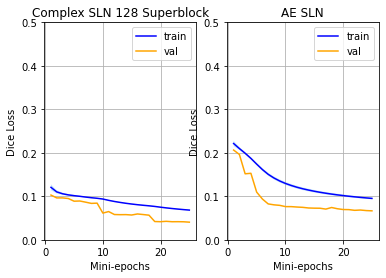

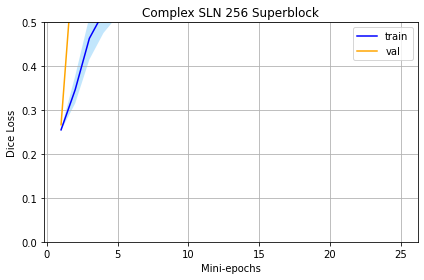

In [12]:
print("configuring combined plots")
domain = len(train_scores1)
x_values = [i+1 for i in range(domain)]
             
a3 = plt.subplot(1,2,1)
a3.set_ylim([0, 0.5])
plt.title("Complex SLN 128 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores1, train_var_1)]
ziptraindown = [a - b for a, b in zip(train_scores1, train_var_1)]
zipvalup = [a + b for a, b in zip(val_scores1, val_var_1)]
zipvaldown = [a - b for a, b in zip(val_scores1, val_var_1)]

plt.plot(x_values, train_scores1, color="blue", label="train")
a3.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores1, color="orange", label="val")
a3.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a4 = plt.subplot(1,2,2)
a4.set_ylim([0, 0.5])
plt.title("AE SLN")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores2, train_var_2)]
ziptraindown = [a - b for a, b in zip(train_scores2, train_var_2)]
zipvalup = [a + b for a, b in zip(val_scores2, val_var_2)]
zipvaldown = [a - b for a, b in zip(val_scores2, val_var_2)]

plt.plot(x_values, train_scores2, color="blue", label="train")
a4.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores2, color="orange", label="val")
a4.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.show()

a2 = plt.subplot(1,1,1)
a2.set_ylim([0, 1])
plt.title("Complex SLN 256 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores3, train_var_3)]
ziptraindown = [a - b for a, b in zip(train_scores3, train_var_3)]
zipvalup = [a + b for a, b in zip(val_scores3, val_var_3)]
zipvaldown = [a - b for a, b in zip(val_scores3, val_var_3)]

plt.plot(x_values, train_scores3, color="blue", label="train")
a2.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores3, color="orange", label="val")
a2.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

plt.close()